# Ablation Experiment Results

In [1]:
from capo.analysis.utils import (
    get_results,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    plot_population_scores_comparison,
    plot_length_score,
)

import os

os.chdir("../../")

c:\Users\schla\AppData\Local\pypoetry\Cache\virtualenvs\capo-JzHO-Y9b-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-14 13:13:22,160	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
# CAPO    # EVO     # CAPO_MUT    # EVO_MUT
colors = ["#1b9e77", "#7570b3", "#66D874", "#9570b2"]
markers = ["o", "o", "d", "d"]

In [3]:
DATASETS = ["agnews", "gsm8k"]

In [7]:
get_results("gsm8k", "llama", "CAPO_zero_shot")

,step,timestamp,time_elapsed,score,prompt,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score,...,input_tokens_sum,output_tokens_sum,input_tokens_cum,output_tokens_cum,system_prompt,few_shots,instr_len,prompt_len,is_new,is_last_occ
0,1,2025-03-22 04:44:12.884820,612.047489,0.616667,Analyze and solve the following elementary sch...,1256,442,149577,318648,0.488,...,150833,319090,150833,319090,You are a helpful assistant.,[],30,31,True,False
1,1,2025-03-22 04:44:12.884820,612.047489,0.608333,I'm having trouble with this grade school math...,1256,442,149577,318648,0.428,...,150833,319090,150833,319090,You are a helpful assistant.,[],39,40,True,False
2,1,2025-03-22 04:44:12.884820,612.047489,0.583333,Please analyze this elementary school math pro...,1256,442,149577,318648,0.428,...,150833,319090,150833,319090,You are a helpful assistant.,[],28,29,True,False
3,1,2025-03-22 04:44:12.884820,612.047489,0.583333,Break down this word problem carefully. Rememb...,1256,442,149577,318648,0.474,...,150833,319090,150833,319090,You are a helpful assistant.,[],21,22,True,False
4,1,2025-03-22 04:44:12.884820,612.047489,0.583333,Calling all math wizards! I need help with thi...,1256,442,149577,318648,0.434,...,150833,319090,150833,319090,You are a helpful assistant.,[],33,34,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,33,2025-03-22 06:36:25.234570,105.603415,0.620833,Break down the given math word problem from el...,1562,630,26475,45894,0.546,...,28037,46524,1944525,3392187,You are a helpful assistant.,[],60,61,False,True
1066,33,2025-03-22 06:36:25.234570,105.603415,0.606667,Decode and resolve the provided mathematical w...,1562,630,26475,45894,0.554,...,28037,46524,1944525,3392187,You are a helpful assistant.,[],52,53,False,True
1067,33,2025-03-22 06:36:25.234570,105.603415,0.600000,Break down the given elementary math story pro...,1562,630,26475,45894,0.556,...,28037,46524,1944525,3392187,You are a helpful assistant.,[],43,44,True,True
1068,33,2025-03-22 06:36:25.234570,105.603415,0.576667,Decompose the provided math word problem from ...,1562,630,26475,45894,0.494,...,28037,46524,1944525,3392187,You are a helpful assistant.,[],37,38,False,True


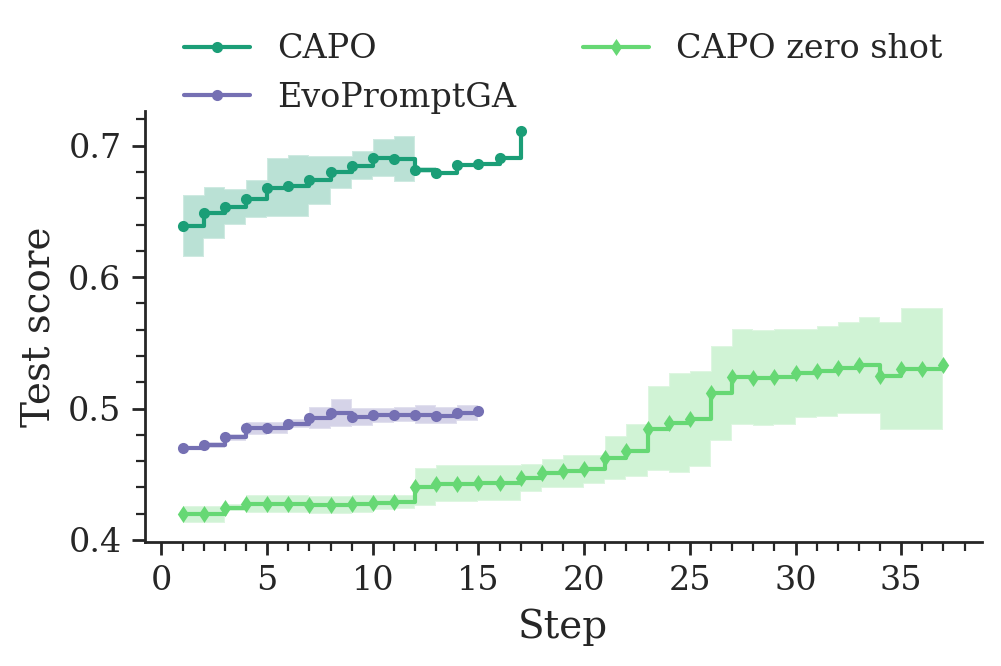

In [6]:
fig = plot_population_scores_comparison(
                "gsm8k",
                "llama",
                ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
                labels=["CAPO", "EvoPromptGA", "CAPO zero shot"],
                plot_stddev=True,
                plot_seeds=False,
                x_col="step",
                colors=colors,
                markers=markers,
                ncols=2,
                figsize=(5.4, 2.8),
            )

## No Racing

Here we remove the racing component of the optimizer, therefore evaluating prompts on the entire dev set. This yields to an substential increase in token usage per step.

Failed to load agnews for -: No objects to concatenate
Failed to load gsm8k for -: No objects to concatenate


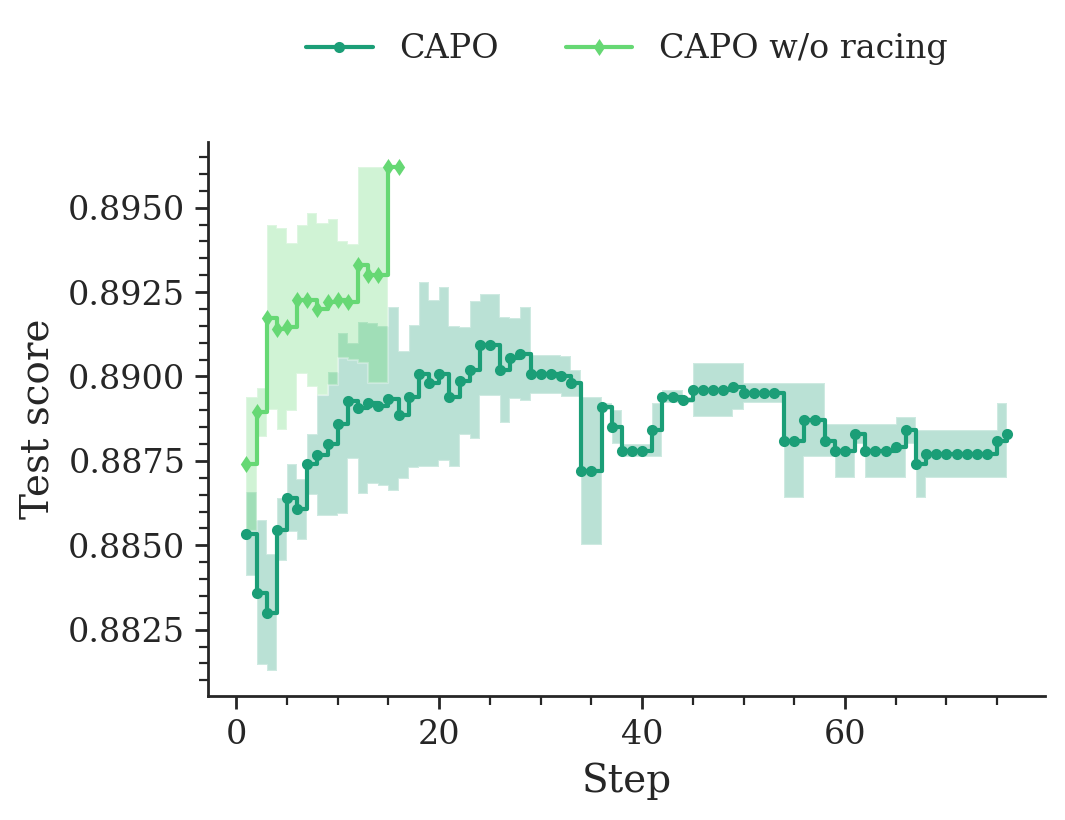

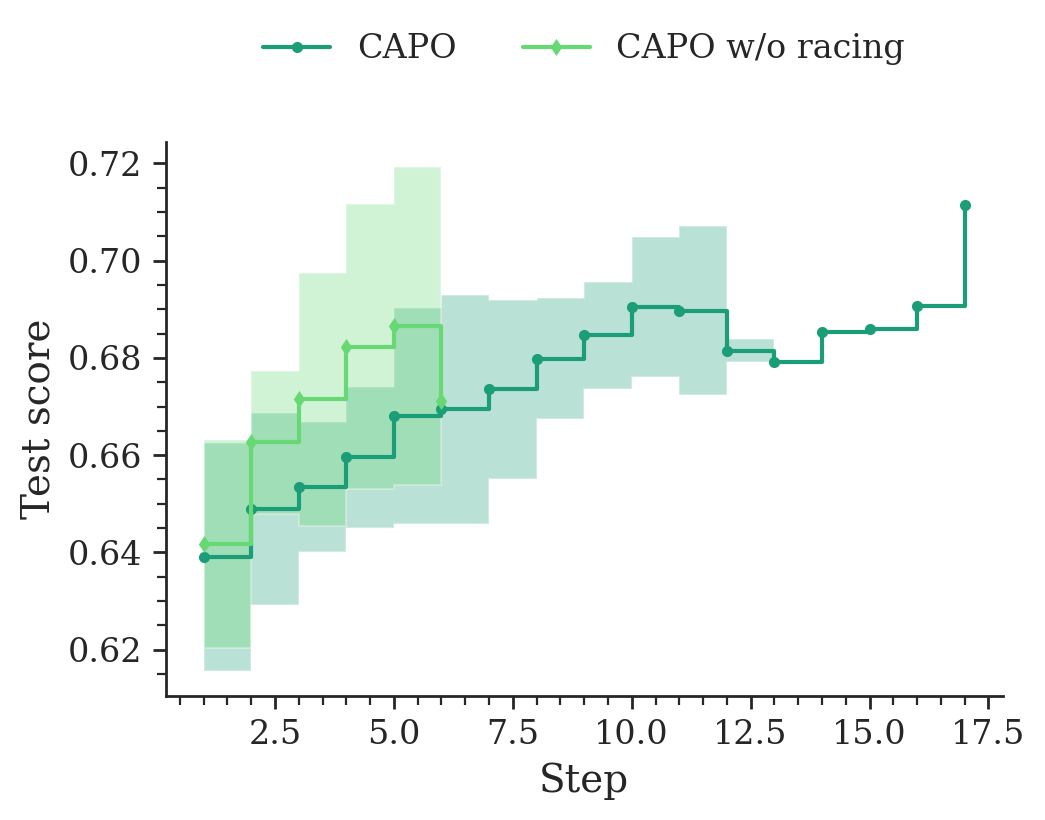

In [5]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "-", "CAPO_no_racing"],
        labels=["CAPO", "-", "CAPO w/o racing"],
        plot_stddev=True,
        x_col="step",
        colors=colors,
        markers=markers,
        ncols=2,
    );

- we can do much more steps if we do racing (3x for agnews/2x for gsm8k) with the 5 mio budget.
- in case of gsm8k we increase in performance, while for agnews we are worse than the no racing version
- performance differences lie really close to each other (within one sd)

Failed to load agnews for -: No objects to concatenate
Failed to load gsm8k for -: No objects to concatenate


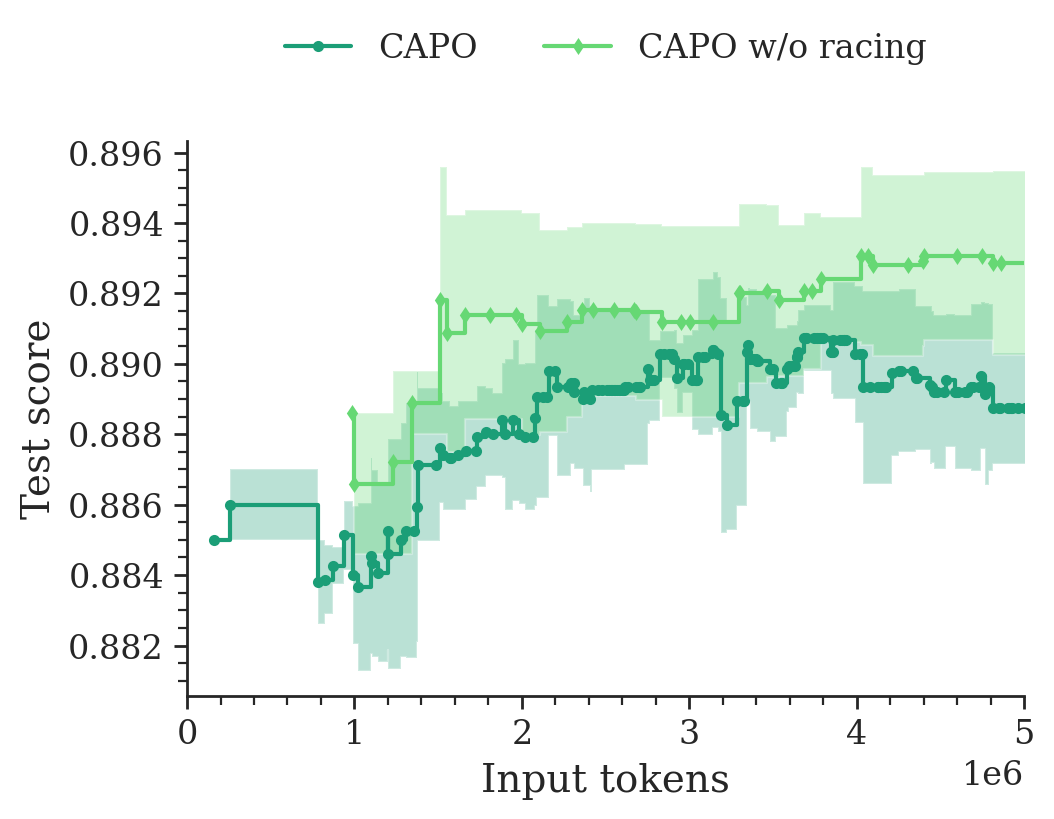

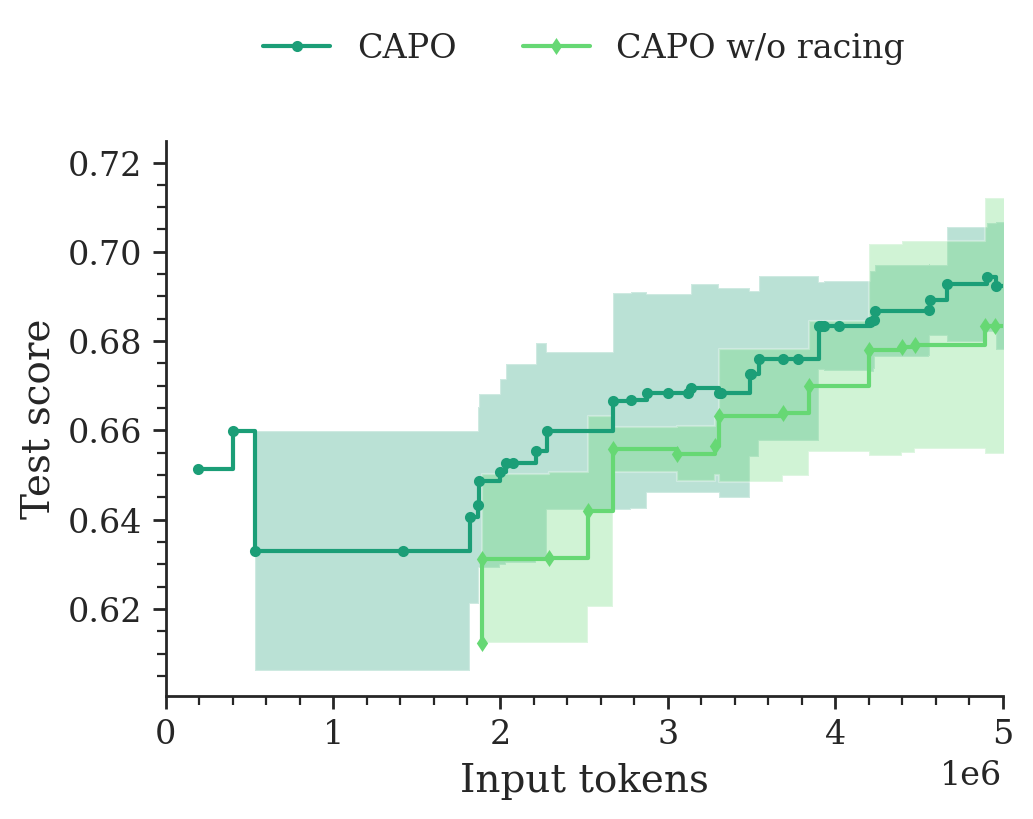

In [6]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "-", "CAPO_no_racing"],
        labels=["CAPO", "-", "CAPO w/o racing"],
        plot_stddev=True,
        plot_seeds=False,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    );

- first results available after less tokens invested (about 500.000 tokens earlier for all seeds)
- in other seeds the results are already available much earlier (after just a couple of 100k tokens)

In [7]:
generate_comparison_table(DATASETS, ["CAPO", "CAPO_no_racing"], "llama")

,agnews,gsm8k,avg
CAPO,88.80±0.75,73.73±3.73,81.27
CAPO_no_racing,89.20±0.43,75.00±3.12,82.10


## Shuffling

We remove shuffling of the blocks in order to see the influence. Shuffling yields to an increased token usage per step, as the probability increases that the evaluation requires the prompt to be evaluated on blocks it has not been evaluated on before.

Failed to load agnews for -: No objects to concatenate
Failed to load gsm8k for -: No objects to concatenate


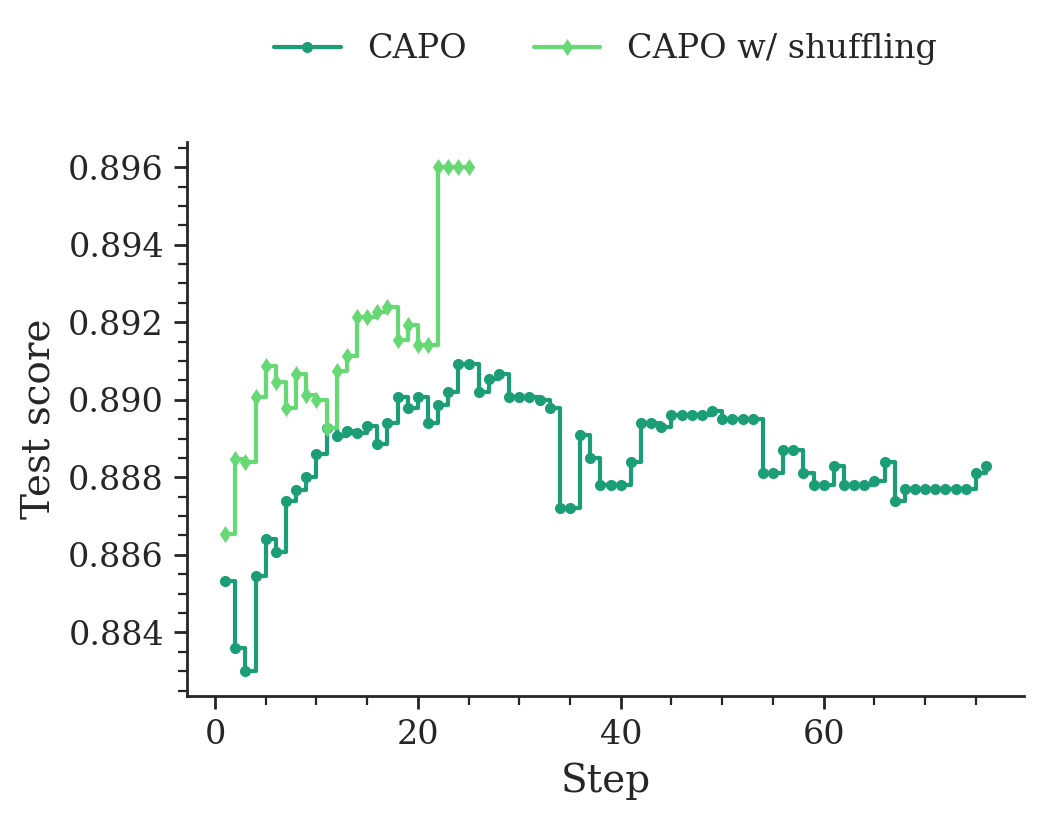

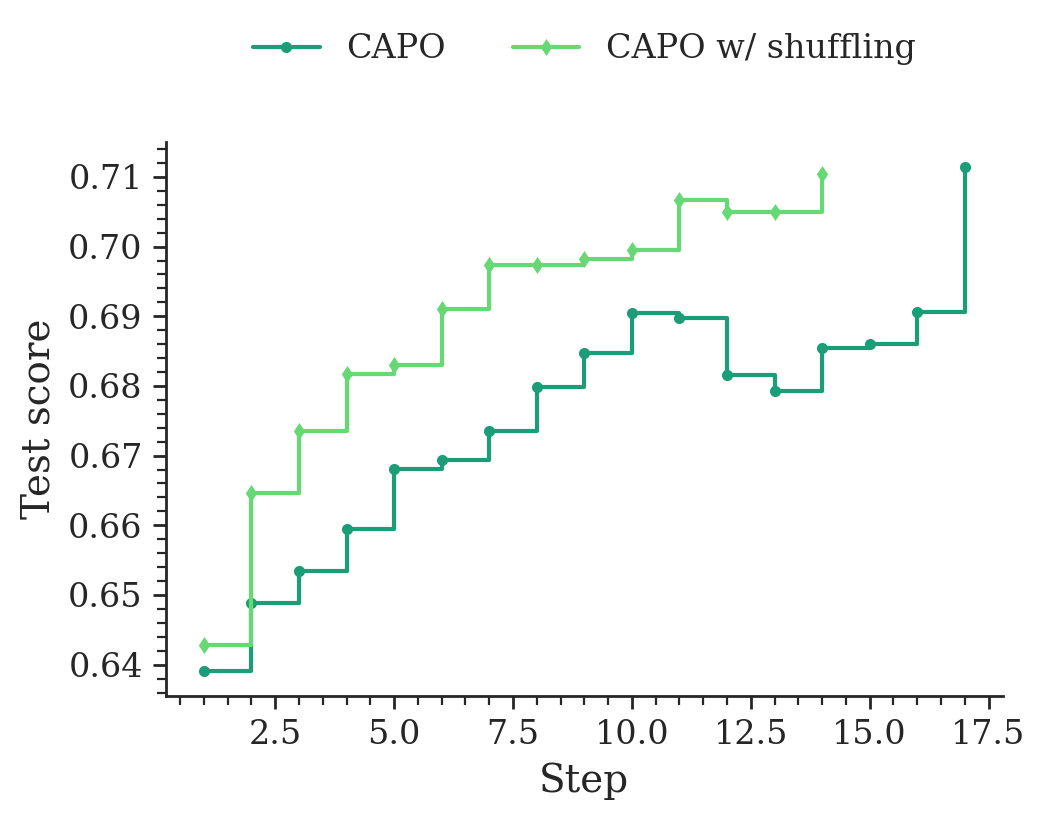

In [8]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "-", "CAPO_shuffling"],
        x_col="step",
        colors=colors,
        markers=markers,
        labels=["CAPO", "-", "CAPO w/ shuffling"],
        ncols=2,
    );

In [9]:
generate_comparison_table(DATASETS, ["CAPO", "CAPO_shuffling"], "llama")

,agnews,gsm8k,avg
CAPO,88.80±0.75,73.73±3.73,81.27
CAPO_shuffling,89.60±0.28,76.73±1.81,83.17


## Zero Shot Performance

We remove few shots from CAPO, in order to see the influence. The token usage per step is drastically reduced, as the prompts become much shorter. However the performance itself is worse, as we are not utilizing ICL.

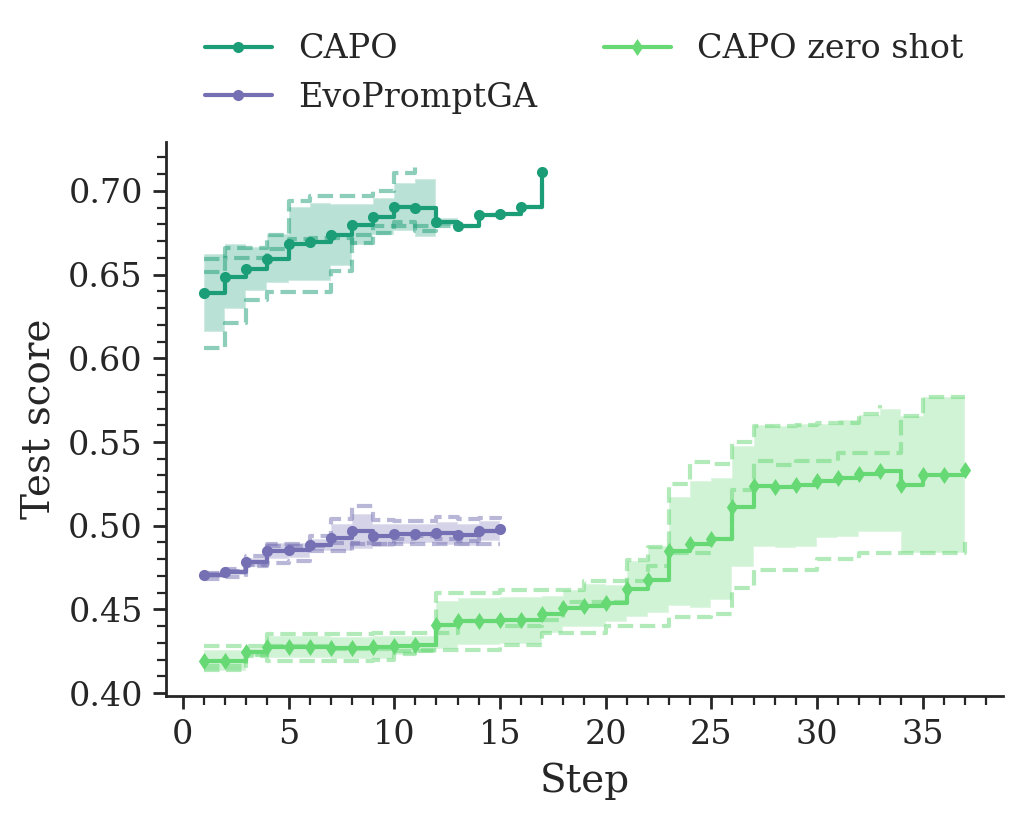

In [10]:
for dataset in ["gsm8k"]:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
        labels=["CAPO", "EvoPromptGA", "CAPO zero shot"],
        plot_stddev=True,
        plot_seeds=True,
        x_col="step",
        colors=colors,
        markers=markers,
        ncols=2,
    );

- we can do much more steps without few shots (less token consuming)
- for agnews we get better results in earlier steps when incorporation few-shots
- for gsm8k the shots have a great influence on the performance

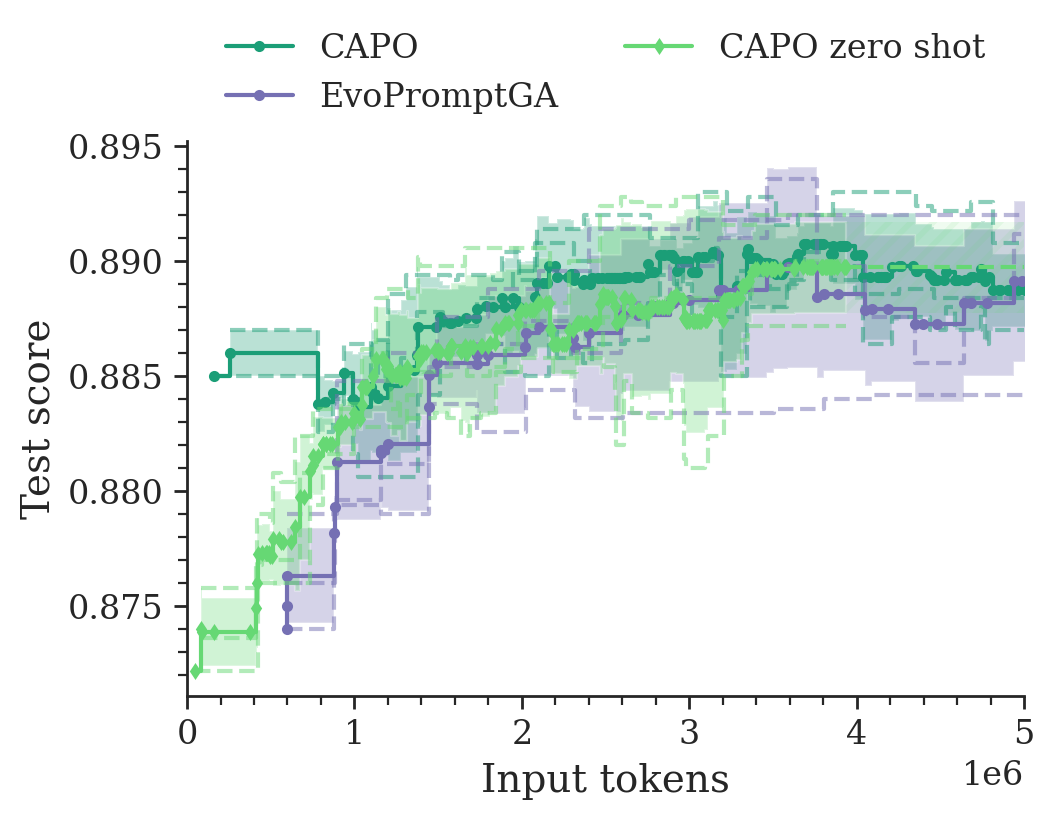

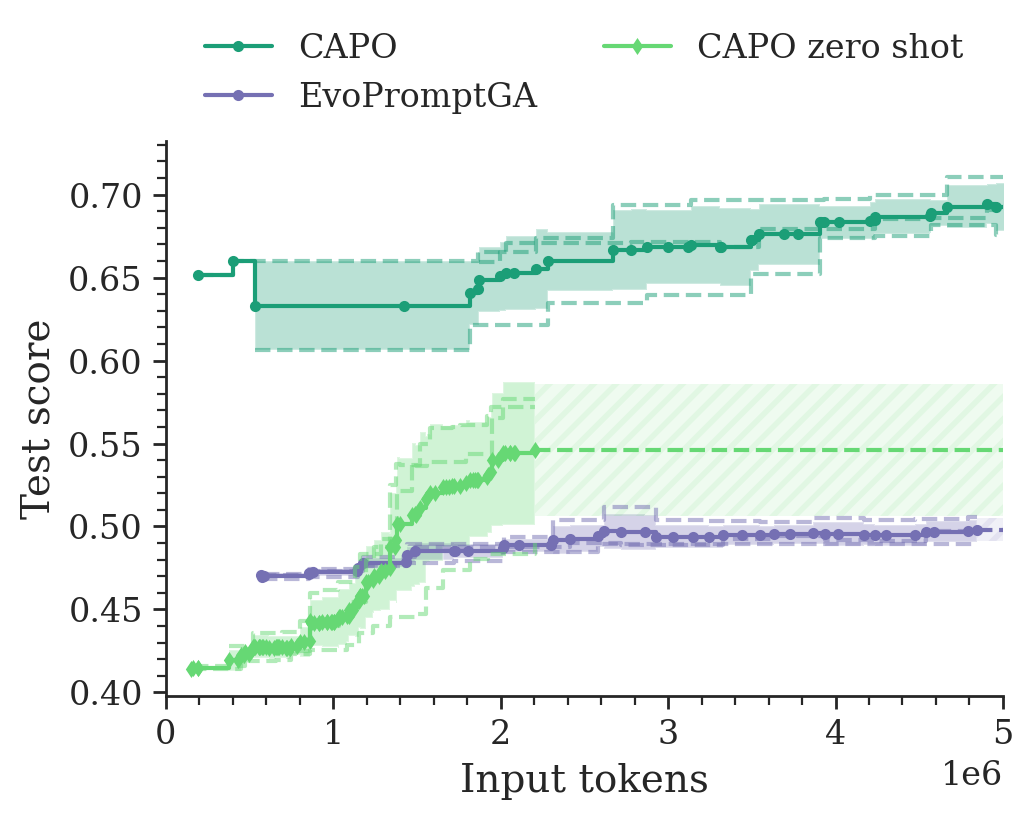

In [11]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
        labels=["CAPO", "EvoPromptGA", "CAPO zero shot"],
        plot_stddev=True,
        plot_seeds=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    );

- higher cost efficiency without few shots (good results are early available)
- despite starting not as good as EvoPrompt we manage to take over the lead 


## Generic Initializations

We test CAPOs and EvoPrompts reliance on good initializiations, by using initial prompts which are not specific to the task.

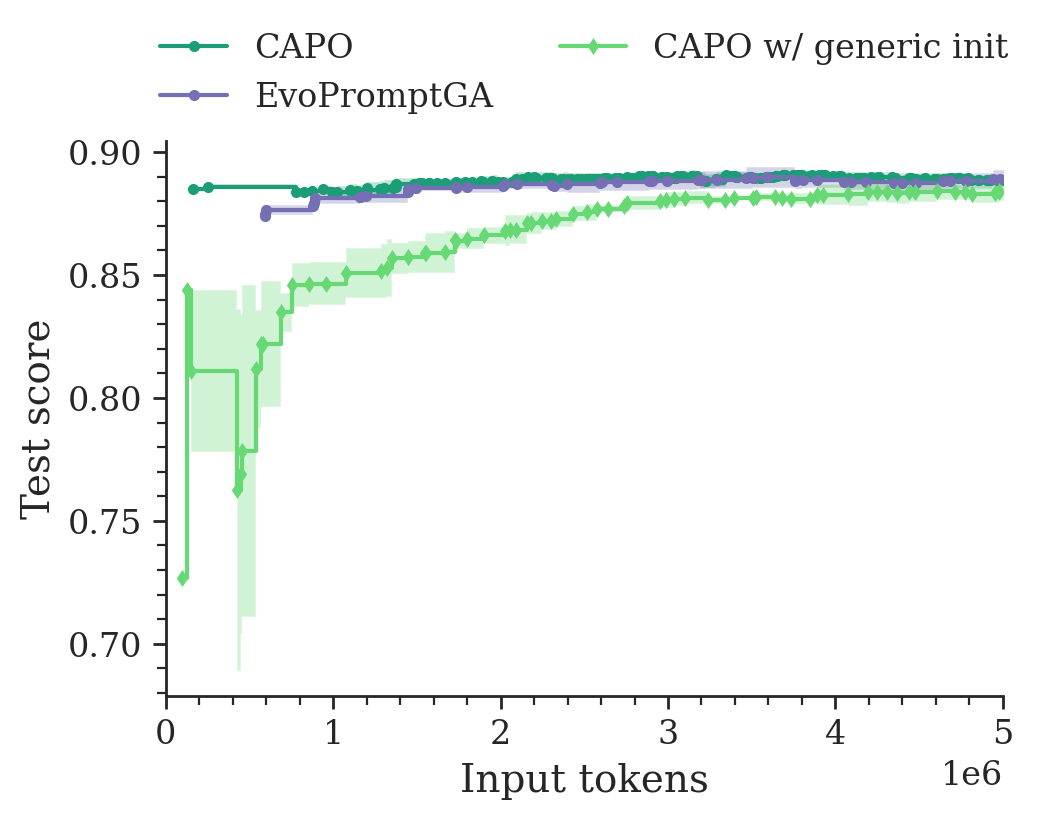

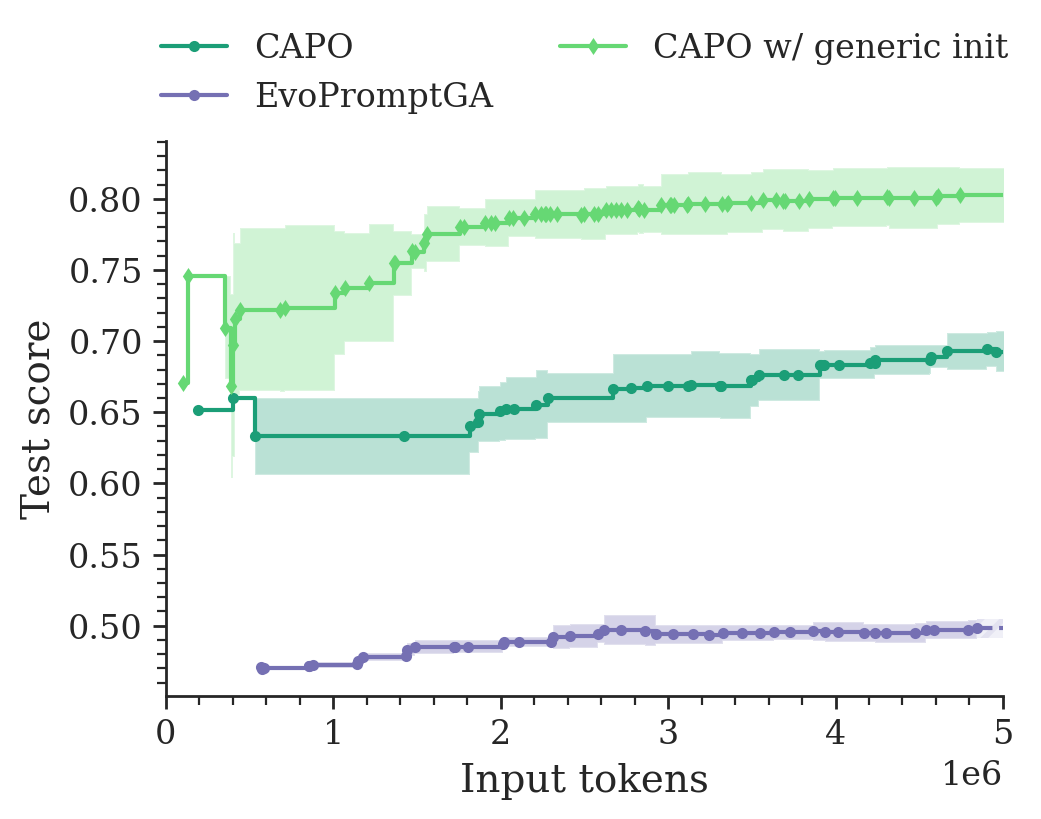

In [12]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_generic_init"],  # , "EvoPromptGA_generic_init"],
        labels=["CAPO", "EvoPromptGA", "CAPO w/ generic init"],  # , "EvoPromptGA w/ generic init"],
        plot_stddev=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    );

In [13]:
generate_comparison_table(
    DATASETS,
    ["CAPO", "EvoPromptGA", "EvoPromptGA_generic_init", "CAPO_generic_init"],
    "llama",
)

,agnews,gsm8k,avg
CAPO,88.80±0.75,73.73±3.73,81.27
EvoPromptGA,88.67±0.41,50.87±0.74,69.77
EvoPromptGA_generic_init,23.20±0.00,53.47±0.38,38.33
CAPO_generic_init,89.33±0.19,82.93±2.36,86.13


In [14]:
generate_comparison_table(
    DATASETS,
    ["CAPO", "EvoPromptGA", "EvoPromptGA_generic_init", "CAPO_generic_init"],
    "llama",
    score_col="prompt_len",
)

,agnews,gsm8k,avg
CAPO,110.33±45.57,480.67±112.90,295.50
EvoPromptGA,30.00±0.82,27.67±2.05,28.83
EvoPromptGA_generic_init,17.00±8.04,20.33±1.89,18.67
CAPO_generic_init,182.00±21.92,205.67±112.74,193.83


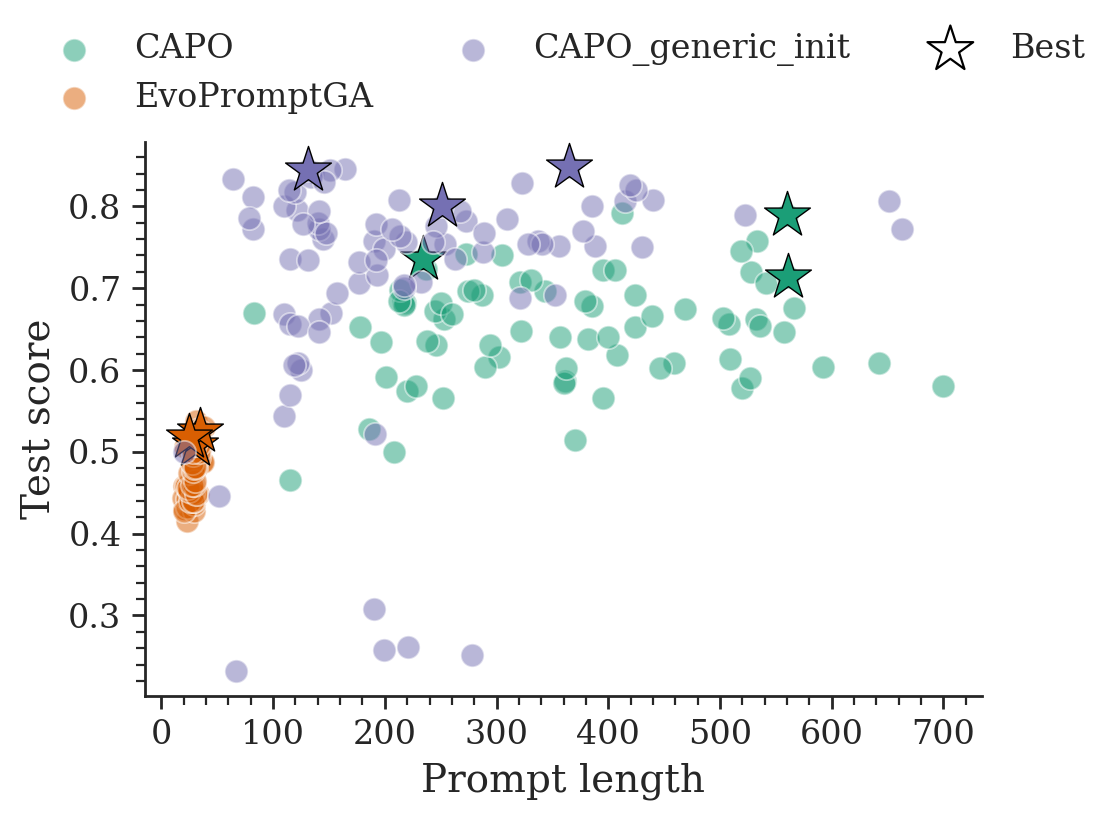

In [15]:
plot_length_score(
    "gsm8k",
    "llama",
    ["CAPO", "EvoPromptGA", "CAPO_generic_init"],
    x_col="prompt_len",
    score_col="test_score",
    log_scale=False,
);

In [16]:
print(
    get_results("gsm8k", "llama", "CAPO_generic_init")
    .groupby("prompt", as_index=False)
    .first()
    .sort_values("test_score", ascending=False)
    .iloc[0]["prompt"]
)

Examine this query thoroughly and deliver your conclusions. All output must be encapsulated in <final_answer> </final_answer> notation for processing purposes.

Input:
Mark wants to build a pyramid of soda cases that's four levels tall. Each level of the pyramid has a square base where each side is one case longer than the level above it. The top level is just one case. How many cases of soda does Mark need?
Output:
To determine the total number of cases Mark needs, we need to calculate the number of cases in each level of the pyramid and then sum them up.

The top level has 1 case, since it's just one case.

The second level has a square base with 2 cases on each side, so it has 2 * 2 = 4 cases.

The third level has a square base with 3 cases on each side, so it has 3 * 3 = 9 cases.

The fourth level has a square base with 4 cases on each side, so it has 4 * 4 = 16 cases.

Now, we add up the number of cases in each level: 1 + 4 + 9 + 16 = 30.

<final_answer> 30 </final_answer>

Input:

## EvoPrompt Simplified Template

We test EvoPrompt on a different Meta-Prompt template, to see the influence of our meta prompts.

Failed to load agnews for -: No objects to concatenate
Failed to load agnews for -: No objects to concatenate
Failed to load gsm8k for -: No objects to concatenate
Failed to load gsm8k for -: No objects to concatenate


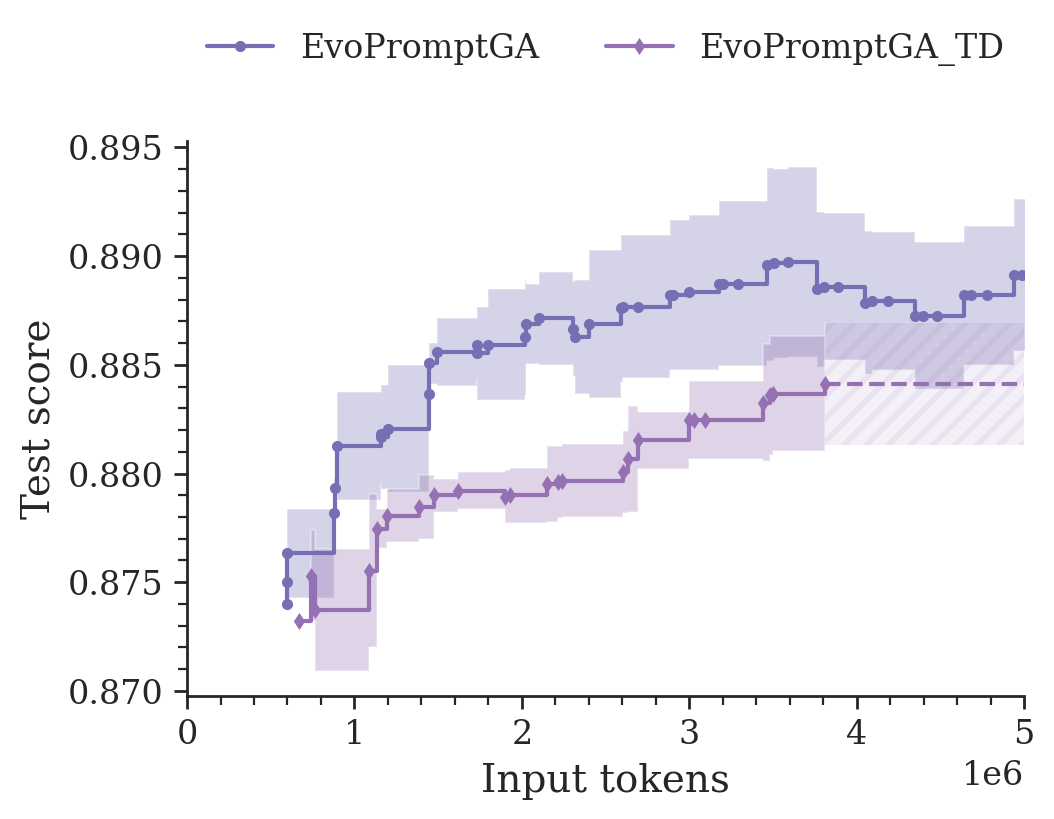

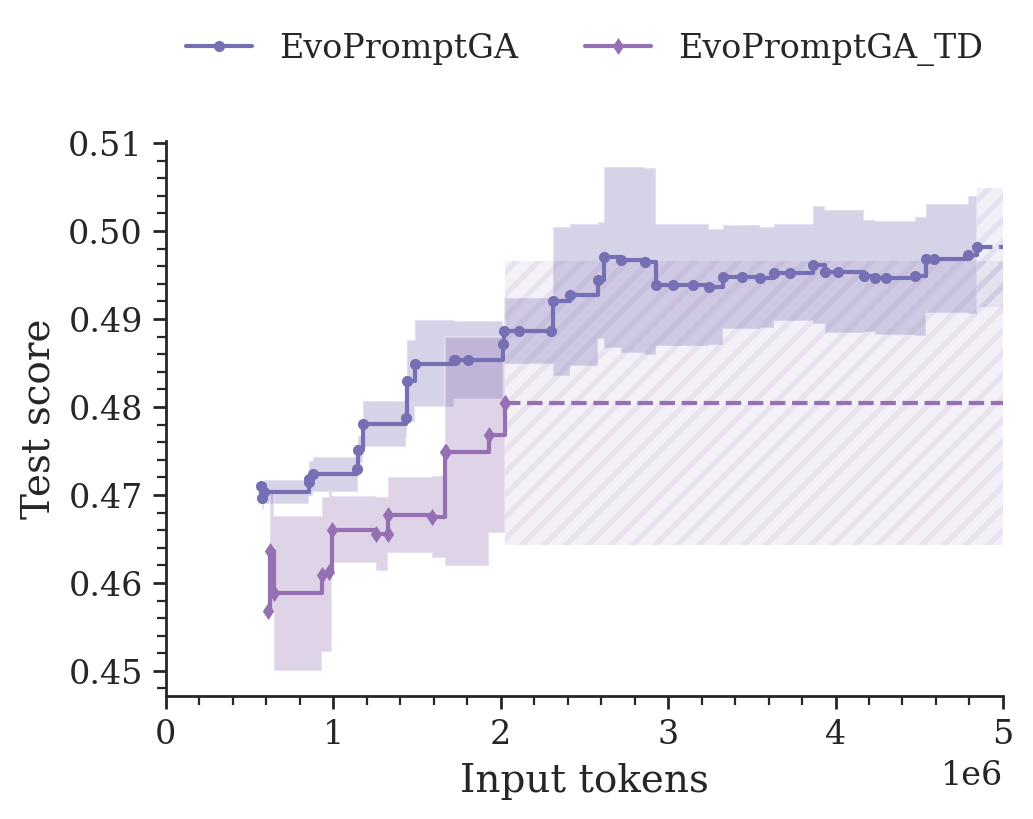

In [17]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["-", "EvoPromptGA", "-", "EvoPromptGA_TD"],
        plot_stddev=True,
        x_col="input_tokens_cum",
        colors=colors,
        markers=markers,
        ncols=2,
    );

- using our simplified template (which also incorporates a task description) we perform slightly worse than the vanilla EvoPromptGA
- lets move this in the appendix

## Plot multiple into one

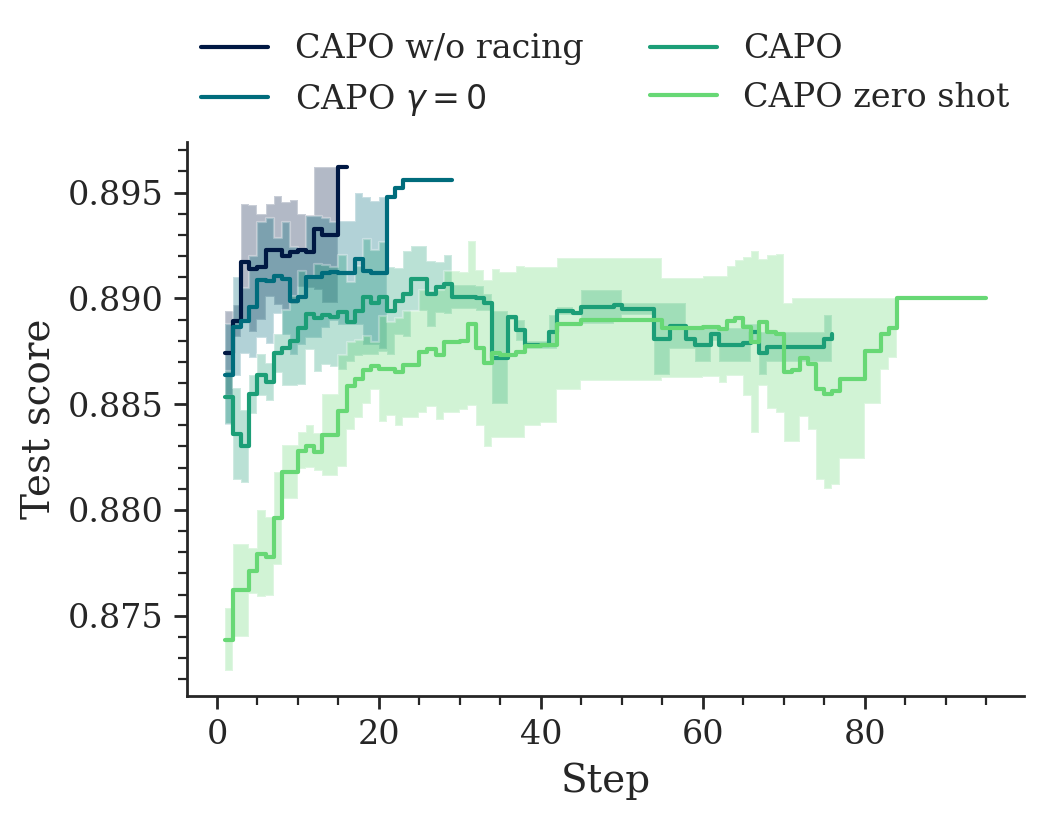

In [18]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    continuous_colors=True,
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

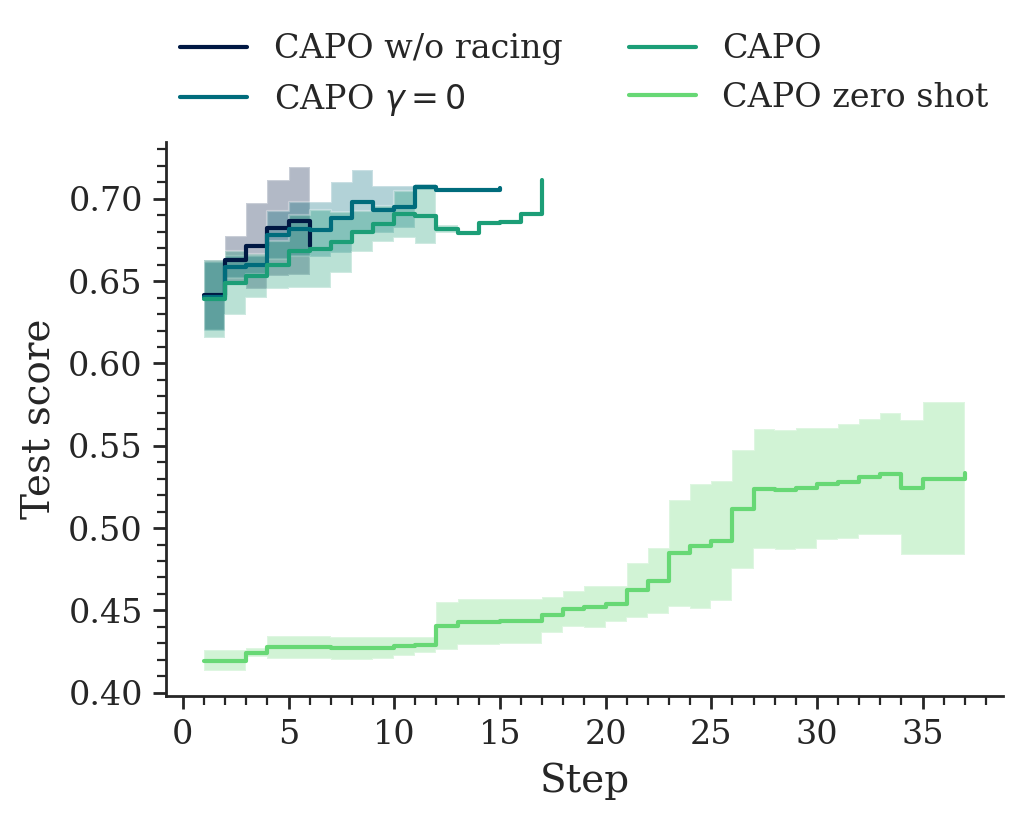

In [19]:
plot_population_scores_comparison(
    "gsm8k",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    continuous_colors=True,
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

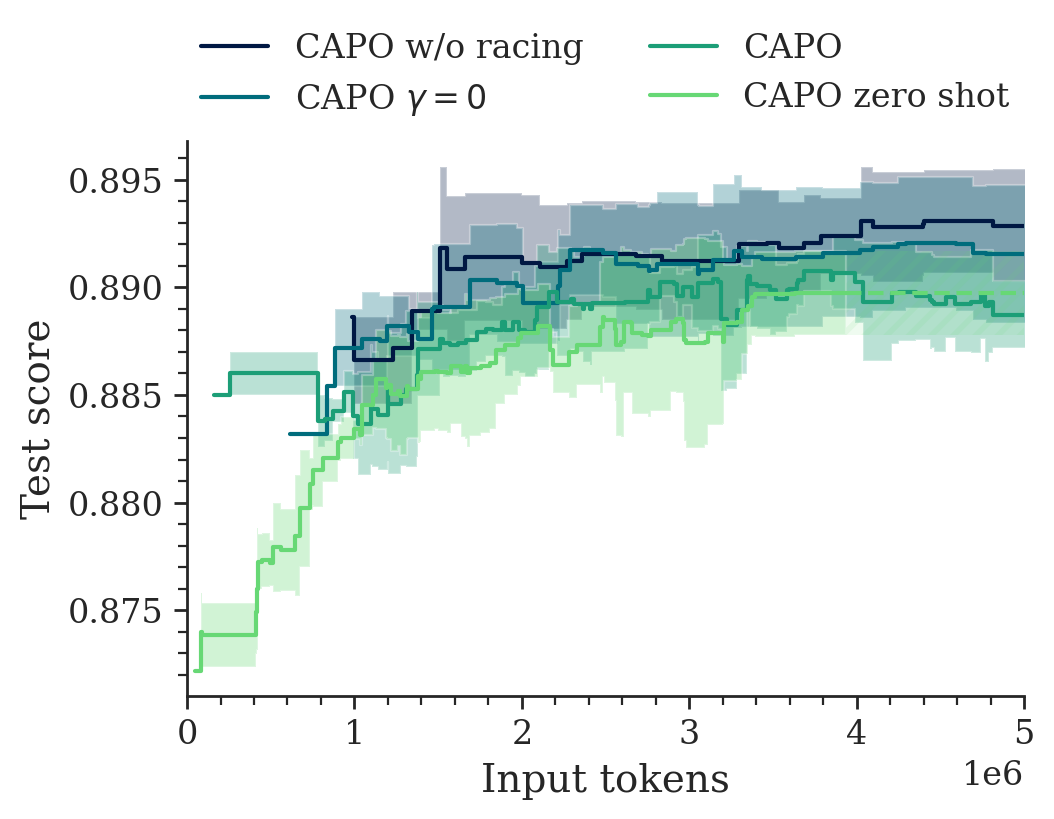

In [20]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO_no_racing", "CAPO_no_lp", "CAPO", "CAPO_zero_shot"],
    labels=["CAPO w/o racing", r"CAPO $\gamma=0$", "CAPO", "CAPO zero shot"],
    x_col="input_tokens_cum",
    continuous_colors=True,
    plot_stddev=True,
    plot_seeds=False,
    ncols=2,
);

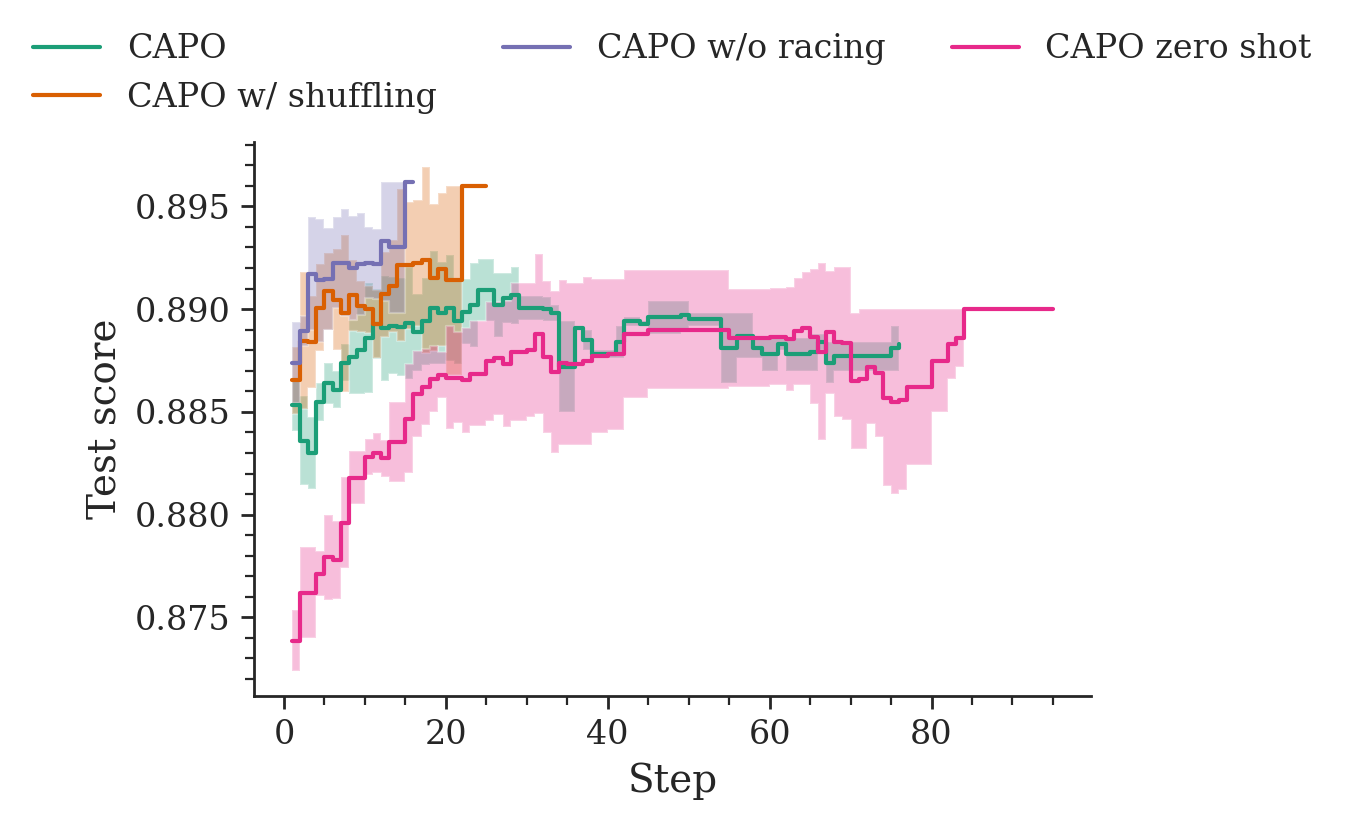

In [21]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO", "CAPO_shuffling", "CAPO_no_racing", "CAPO_zero_shot"],
    labels=["CAPO", "CAPO w/ shuffling", "CAPO w/o racing", "CAPO zero shot"],
    plot_stddev=True,
    plot_seeds=False,
);

In [22]:
generate_comparison_table(
    datasets=["agnews", "gsm8k"],
    optims=[
        "CAPO",
        "CAPO_zero_shot",
        "CAPO_no_lp",
        "CAPO_no_racing",
        "CAPO_generic_init",
        "EvoPromptGA",
    ],
    model="llama",
)

,agnews,gsm8k,avg
CAPO,88.80±0.75,73.73±3.73,81.27
CAPO_zero_shot,89.00±0.16,62.40±6.15,75.70
CAPO_no_lp,89.27±0.41,74.93±1.04,82.10
CAPO_no_racing,89.20±0.43,75.00±3.12,82.10
CAPO_generic_init,89.33±0.19,82.93±2.36,86.13
EvoPromptGA,88.67±0.41,50.87±0.74,69.77


In [23]:
generate_comparison_table(
    datasets=["agnews", "gsm8k"],
    optims=[
        "CAPO",
        "CAPO_zero_shot",
        "CAPO_no_lp",
        "CAPO_no_racing",
        "CAPO_generic_init",
        "EvoPromptGA",
    ],
    model="llama",
    score_col="prompt_len",
)

,agnews,gsm8k,avg
CAPO,110.33±45.57,480.67±112.90,295.50
CAPO_zero_shot,48.00±3.56,93.67±16.76,70.83
CAPO_no_lp,127.67±27.21,297.00±26.55,212.33
CAPO_no_racing,146.33±51.77,468.67±129.87,307.50
CAPO_generic_init,182.00±21.92,205.67±112.74,193.83
EvoPromptGA,30.00±0.82,27.67±2.05,28.83


# CAPO without anything

We combine the above mentioned set ups, by removing length penalties, few shots and racing, in order to see the combined impact of the components.

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\tzehl\AppData\Local\Temp\ipykernel_13184\3663141944.py:5: SyntaxWarning: invalid escape sequence '\g'
  labels=["CAPO", "CAPO w/o racing, $\gamma=0$, no FS", "EvoPromptGA"],


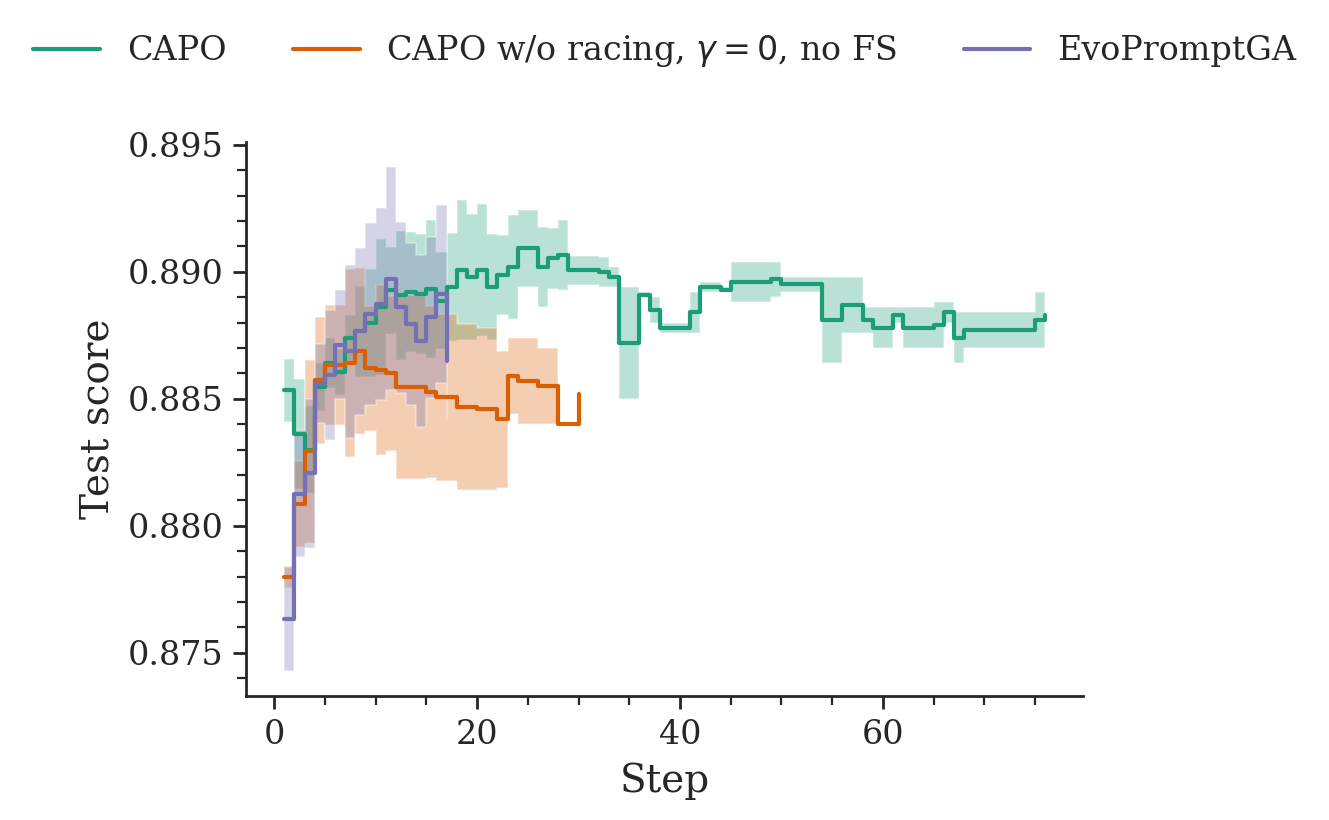

In [27]:
plot_population_scores_comparison(
    "agnews",
    "llama",
    ["CAPO", "CAPO_no_racing_gamma_0_no_fs", "EvoPromptGA"],
    labels=["CAPO", "CAPO w/o racing, $\gamma=0$, no FS", "EvoPromptGA"],
    plot_stddev=True,
    plot_seeds=False,
);

<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
C:\Users\tzehl\AppData\Local\Temp\ipykernel_13184\3489793208.py:5: SyntaxWarning: invalid escape sequence '\g'
  labels=["CAPO", "CAPO w/o racing, $\gamma=0$, zero-shot", "EvoPromptGA"],


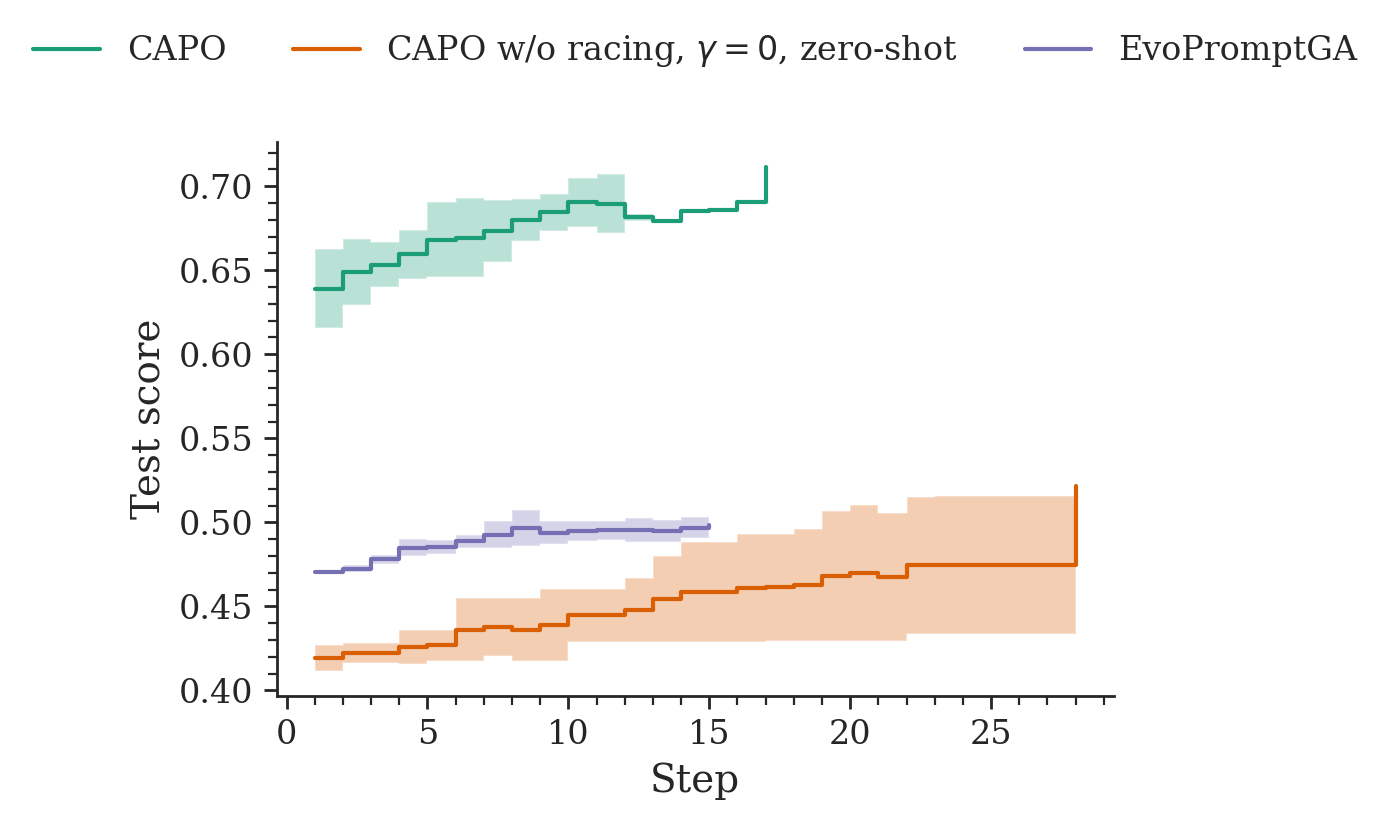

In [26]:
plot_population_scores_comparison(
    "gsm8k",
    "llama",
    ["CAPO", "CAPO_no_racing_gamma_0_no_fs", "EvoPromptGA"],
    labels=["CAPO", "CAPO w/o racing, $\gamma=0$, zero-shot", "EvoPromptGA"],
    plot_stddev=True,
    plot_seeds=False,
);

In [28]:
generate_comparison_table(
    datasets=["agnews", "gsm8k"],
    optims=["CAPO", "CAPO_no_racing_gamma_0_no_fs", "EvoPromptGA"],
    model="llama",
)

,agnews,gsm8k,avg
CAPO,88.80±0.75,73.73±3.73,81.27
CAPO_no_racing_gamma_0_no_fs,88.53±0.09,50.93±5.25,69.73
EvoPromptGA,88.67±0.41,50.87±0.74,69.77


In [29]:
generate_comparison_table(
    datasets=["agnews", "gsm8k"],
    optims=["CAPO", "CAPO_no_racing_gamma_0_no_fs", "EvoPromptGA"],
    model="llama",
    score_col="prompt_len",
)

,agnews,gsm8k,avg
CAPO,110.33±45.57,480.67±112.90,295.50
CAPO_no_racing_gamma_0_no_fs,77.67±10.96,37.00±12.19,57.33
EvoPromptGA,30.00±0.82,27.67±2.05,28.83
